<a href="https://colab.research.google.com/github/Harshit1Deep/Shopping-Cart-management/blob/main/Shopping_Cart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
print("hello")

hello


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

In [2]:
colors = ["#18eded","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

In [3]:
df = pd.read_csv("file.csv")
df.sample(5)

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
3670,3670,14449.0,M,New Jersey,39.0,18792.0,2019-01-25,GGOEGHGT019599,Google Sunglasses,Lifestyle,...,3.61,6.50,Not Used,0.18,1/25/2019,1000.0,1124.95,1.0,EXTRA10,10.0
1575,1575,12583.0,M,Chicago,33.0,16692.0,2019-01-01,GGOEYFKQ020699,YouTube Custom Decals,Office,...,1.64,102.79,Clicked,0.10,1/1/2019,4500.0,2424.50,1.0,OFF10,10.0
4739,4739,16456.0,M,California,47.0,48287.0,2019-12-28,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,...,80.52,6.50,Used,0.10,12/28/2019,4000.0,3246.84,12.0,ELEC30,30.0
19499,19499,15727.0,F,Chicago,40.0,30104.0,2019-06-11,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,119.00,6.00,Not Used,0.10,6/11/2019,3000.0,1428.32,6.0,ELEC30,30.0
8283,8283,12502.0,F,California,23.0,47127.0,2019-12-16,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,...,355.74,6.50,Not Used,0.05,12/16/2019,4000.0,3116.98,12.0,NE30,30.0


In [ ]:
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")


Number of column :21
Number of rows :52955


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,31
Gender,31
Location,31
Tenure_Months,31
Transaction_ID,31
Transaction_Date,31
Product_SKU,31
Product_Description,31
Product_Category,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [ ]:
df['Transaction_ID'].nunique()

25061

In [ ]:
columns_to_drop = ['Unnamed: 0', 'CustomerID', 'Transaction_ID', 'Product_Description', 'Coupon_Code','Product_SKU']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            52924 non-null  object 
 1   Location          52924 non-null  object 
 2   Tenure_Months     52924 non-null  float64
 3   Transaction_Date  52924 non-null  object 
 4   Product_Category  52955 non-null  object 
 5   Quantity          52924 non-null  float64
 6   Avg_Price         52924 non-null  float64
 7   Delivery_Charges  52924 non-null  float64
 8   Coupon_Status     52924 non-null  object 
 9   GST               52924 non-null  float64
 10  Date              52924 non-null  object 
 11  Offline_Spend     52924 non-null  float64
 12  Online_Spend      52924 non-null  float64
 13  Month             52955 non-null  int64  
 14  Discount_pct      52555 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 6.1+ MB


In [ ]:
print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")

Number of column :15
Number of rows :52955


In [ ]:
gender_sum = df['Gender'].value_counts()

In [ ]:
iplot(px.pie(values=[gender_sum[0], gender_sum[1]],
       names=['Females','Males'],
       color_discrete_sequence = ['#4287f5', '#f54287'],
       title="How many males and females we have ?").update_traces(textinfo='value+percent'))

<ipython-input-15-b2eee4cb4806>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
location_sum = df['Location'].value_counts()

In [ ]:
iplot(px.bar(location_sum,
             title = 'Places for online shopping',
             color = location_sum.index,
             color_discrete_sequence = colors,
             text_auto=True,
             labels=dict(index='Locations',value='sum')))

<ipython-input-18-6c35fbecefb1>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-18-6c35fbecefb1>:2: UserWarning:


The palette list has fewer values (4) than needed (49) and will cycle, which may produce an uninterpretable plot.



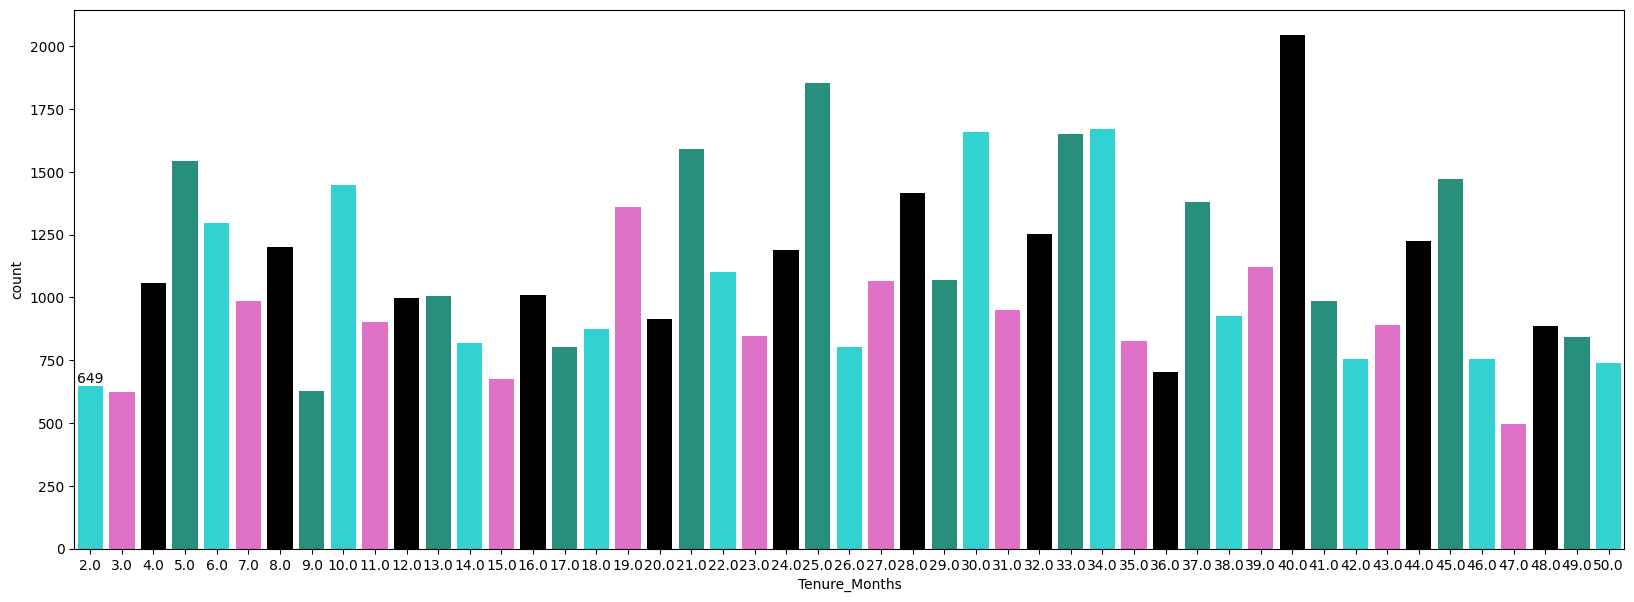

In [ ]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x = df['Tenure_Months'], palette= colors[0:4])
ax.bar_label(ax.containers[0])
plt.show()

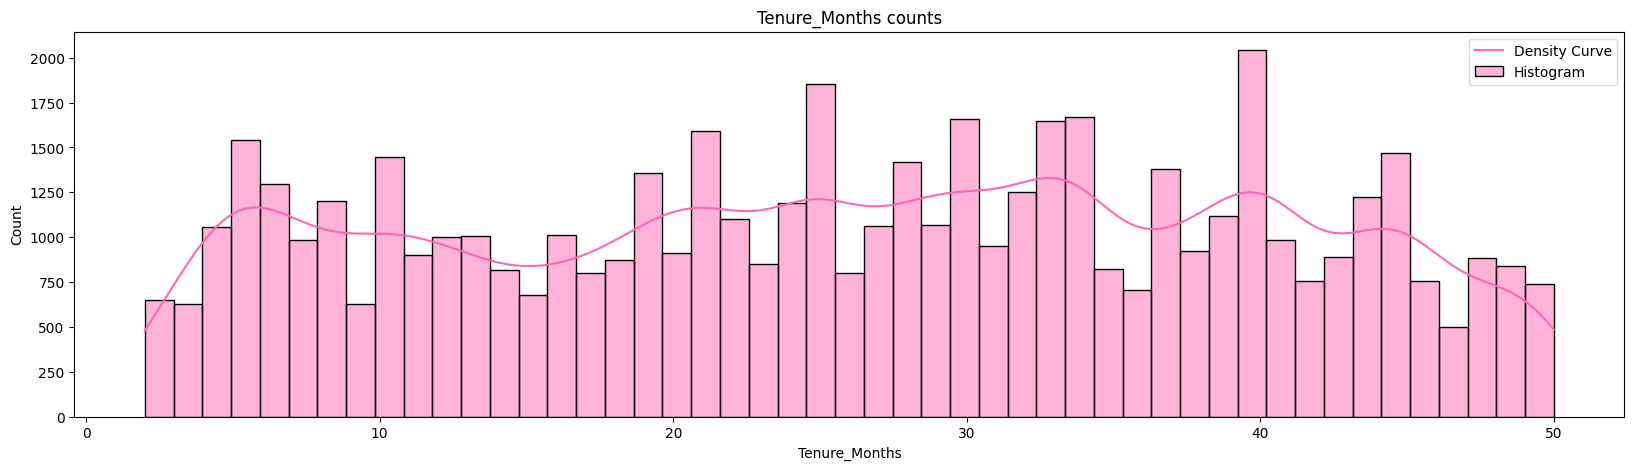

In [ ]:
fig, ax = plt.subplots(figsize = (20, 5))

sns.histplot(df['Tenure_Months'], bins = 49, kde = True, color = '#FF69B4', ax = ax)

ax.set_xlabel('Tenure_Months')
ax.set_ylabel('Count')
ax.set_title('Tenure_Months counts')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [ ]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Date'] = pd.to_datetime(df['Date'])

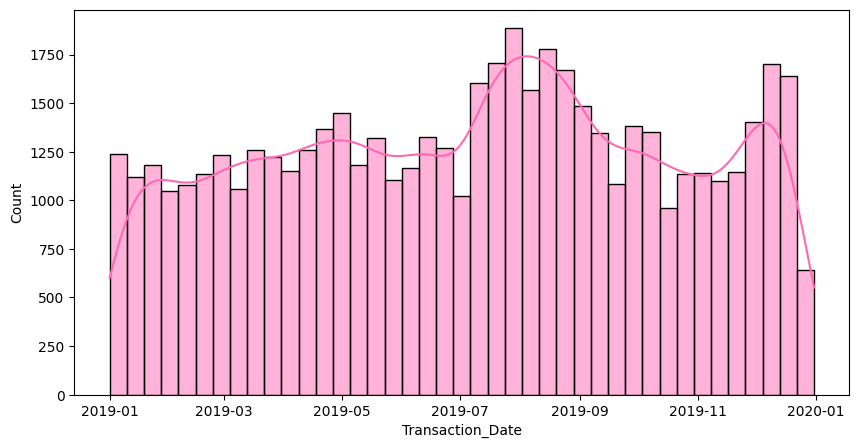

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Transaction_Date'],kde = True, color = '#FF69B4')

ax.set_xlabel('Transaction_Date')
ax.set_ylabel('Count')
ax.set_title('Transaction_Date counts')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [ ]:
Product_Category_count = df['Product_Category'].value_counts()

In [ ]:
iplot(px.bar(Product_Category_count,
             color = Product_Category_count.index,
             color_discrete_sequence = colors,
             text_auto=True,
             labels=dict(y = 'product_category', x = 'sum'),
             orientation= "h"))

In [ ]:
iplot(px.histogram(df,
                   'Quantity',
                   title='Quantity of the product purchased in the transaction',
                   color_discrete_sequence=[colors[1]]))

In [ ]:
iplot(px.histogram(df,
                   'Avg_Price',
                   title='Average price of the product',
                   color_discrete_sequence=[colors[7]]))

<Axes: ylabel='Delivery_Charges'>

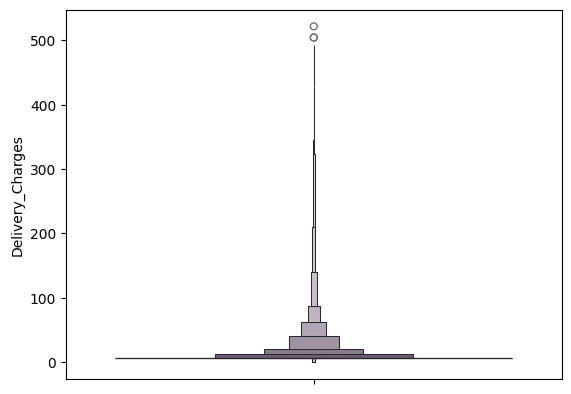

In [ ]:
sns.boxenplot(df['Delivery_Charges'],color= colors[6])


In [ ]:
Coupon_Status_sum = df['Coupon_Status'].value_counts()

In [ ]:
iplot(px.bar(Coupon_Status_sum,
             color = Coupon_Status_sum.index,
             color_discrete_sequence = colors[4:7],
             title = 'sum of the coupon status',
             text_auto=True,
             labels=dict(index='coupon status',value='sum')))

In [ ]:
GST_sum = df['GST'].value_counts()

In [ ]:
iplot(px.bar(GST_sum,
             color = GST_sum.index,
             title = 'sum of GST',
             text_auto=True,
             labels=dict(index='GST',value='sum')))

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_spending = df.groupby('Month')['Online_Spend'].sum()

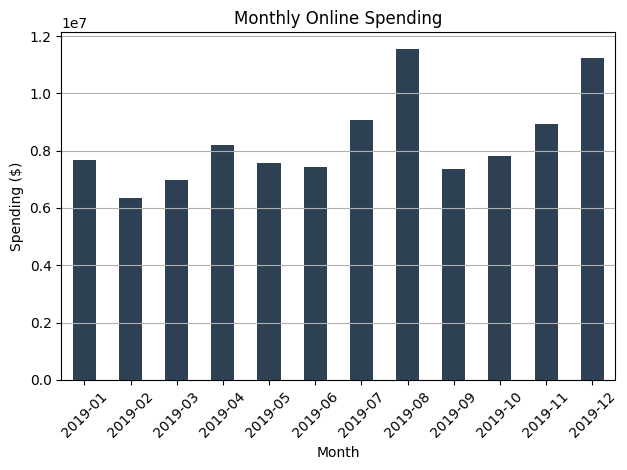

In [ ]:
monthly_spending.plot(kind='bar', color='#2E4053')
plt.title('Monthly Online Spending')
plt.xlabel('Month')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_Offline_spending = df.groupby('Month')['Offline_Spend'].sum()

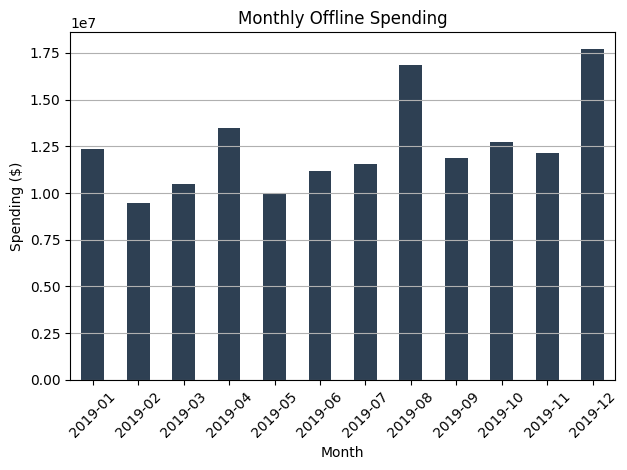

In [ ]:
monthly_Offline_spending.plot(kind='bar', color='#2E4053')
plt.title('Monthly Offline Spending')
plt.xlabel('Month')
plt.ylabel('Spending ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
discount_counts = df['Discount_pct'].value_counts()

In [ ]:
fig = px.pie(names=discount_counts.index,
             values=discount_counts.values,
             color_discrete_sequence = colors[5:8],
             title="Discount Percentage Distribution",
             labels={'names': 'Discount Percentage'})

fig.update_traces(textinfo='label+percent')
fig.show()

In [ ]:
histogram_labels = ['Tenure_Months',
                    'Quantity',
                    'Delivery_Charges',
                    'GST',
                    'Offline_Spend',
                    'Online_Spend',
                   ]

colors = px.colors.qualitative.Plotly
for i in range(len(histogram_labels)):
    fig = px.histogram(df,
                       histogram_labels[i],
                       title=f'{histogram_labels[i]} distribution in top hits',
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)